In [1]:
import pandas as pd
import numpy as np
import math

train_raw = pd.read_csv('train.csv')
test_raw = pd.read_csv('test.csv')

In [2]:
train_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 1. 데이터 전처리 + EDA

In [3]:
train_raw.drop(['Name','Ticket','Cabin'], axis=1, inplace=True)
test_raw.drop(['Name','Ticket','Cabin'], axis=1, inplace=True)

## 1.1 Pclass 

In [4]:
train_raw['Pclass'].isnull().sum()

0

In [5]:
train_raw['Pclass'].isnull().sum()

0

## 1.2 Sex

In [6]:
train_raw['Sex'].isnull().sum()

0

In [7]:
test_raw['Sex'].isnull().sum()

0

## 1.3 SibSp, Parch -> Family 

In [8]:
train_raw['Family'] = train_raw['SibSp']+train_raw['Parch']

In [9]:
train_raw.drop(['SibSp','Parch'], axis=1, inplace=True)

In [10]:
train_raw['Family'].isnull().sum()

0

In [11]:
train_raw['Family'].loc[train_raw['Family']>0] = 1

C:\Users\Hong Minji\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [12]:
test_raw['Family'] = test_raw['SibSp']+test_raw['Parch']

In [13]:
test_raw.drop(['SibSp','Parch'], axis=1, inplace=True)

In [14]:
test_raw['Family'].isnull().sum()

0

In [15]:
test_raw['Family'].loc[test_raw['Family']>0] = 1

## 1.4 Fare 

In [16]:
train_raw['Fare'].isnull().sum()

0

In [17]:
test_raw['Fare'].isnull().sum()

1

In [18]:
test_raw['Fare'] = test_raw['Fare'].fillna(test_raw.mean()['Fare'])

Fare_group : Fare를 금액대별로 나눠서 분석에 용이하도록

In [19]:
train_raw['Fare_group'] = train_raw['Fare']//10

In [20]:
for i in range(len(train_raw['Fare_group'])):
    if train_raw['Fare_group'][i] > 10:
        train_raw['Fare_group'][i] = 10

C:\Users\Hong Minji\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
train_raw.drop(['Fare'], axis=1, inplace=True)

In [22]:
test_raw['Fare_group'] = test_raw['Fare']//10

In [23]:
for i in range(len(test_raw['Fare_group'])):
    if test_raw['Fare_group'][i] > 10:
        test_raw['Fare_group'][i] = 10

C:\Users\Hong Minji\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
test_raw.drop(['Fare'], axis=1, inplace=True)

## 1.5 Embarked

In [25]:
train_raw['Embarked'].isnull().sum()

2

In [26]:
train_raw['Embarked'] = train_raw['Embarked'].fillna("S")

In [27]:
test_raw['Embarked'].isnull().sum()

0

## 1.6 Age

In [28]:
raw = pd.concat([train_raw, test_raw])

C:\Users\Hong Minji\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [29]:
raw['Age'].isnull().sum()

263

In [30]:
Age_NA = raw['Age'].isnull()
raw_na = raw[Age_NA].reset_index(drop=True)
raw_not_na = raw[-Age_NA].reset_index(drop=True)

In [31]:
raw_na.head()

,Age,Embarked,Family,Fare_group,PassengerId,Pclass,Sex,Survived
0,NaN,Q,0,0.0,6,3,male,0.0
1,NaN,S,0,1.0,18,2,male,1.0
2,NaN,C,0,0.0,20,3,female,1.0
3,NaN,C,0,0.0,27,3,male,0.0
4,NaN,Q,0,0.0,29,3,female,1.0


In [32]:
len(raw_na)

263

In [33]:
raw_not_na.head()

,Age,Embarked,Family,Fare_group,PassengerId,Pclass,Sex,Survived
0,22.0,S,1,0.0,1,3,male,0.0
1,38.0,C,1,7.0,2,1,female,1.0
2,26.0,S,0,0.0,3,3,female,1.0
3,35.0,S,1,5.0,4,1,female,1.0
4,35.0,S,0,0.0,5,3,male,0.0


In [34]:
len(raw_not_na)

1046

In [35]:
check = []

for i in range(263):
    for j in range(1046):
        if raw_na['Pclass'][i]==raw_not_na['Pclass'][j] and \
        raw_na['Sex'][i]==raw_not_na['Sex'][j] and \
        (raw_na['Embarked'][i]==raw_not_na['Embarked'][j]) and \
        (raw_na['Family'][i]==raw_not_na['Family'][j]) and \
        (raw_na['Fare_group'][i]==raw_not_na['Fare_group'][j]):
            check.append(j)
            break
        else:
            if j==1045:
                check.append(0)
                
len(check)

raw_na['has_same'] = check

In [36]:
check2 = []

for i in range(263):
    for j in range(1046):
        if raw_na['Pclass'][i]==raw_not_na['Pclass'][j] and \
        raw_na['Sex'][i]==raw_not_na['Sex'][j] and \
        (raw_na['Embarked'][i]==raw_not_na['Embarked'][j]) and \
        (raw_na['Family'][i]==raw_not_na['Family'][j]):
            check2.append(j)
            break
        else:
            if j==1045:
                check2.append(0)
                
len(check2)

raw_na['has_same2'] = check2

In [37]:
for i in range(263):
    if raw_na['has_same'][i] != 0:
        raw_na['Age'][i] = raw_not_na['Age'][raw_na['has_same'][i]]
    else:
        raw_na['Age'][i] = raw_not_na['Age'][raw_na['has_same2'][i]]

C:\Users\Hong Minji\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Hong Minji\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [38]:
raw_na.head()

,Age,Embarked,Family,Fare_group,PassengerId,Pclass,Sex,Survived,has_same,has_same2
0,70.5,Q,0,0.0,6,3,male,0.0,91,91
1,34.0,S,0,1.0,18,2,male,1.0,18,17
2,13.0,C,0,0.0,20,3,female,1.0,621,89
3,28.5,C,0,0.0,27,3,male,0.0,42,42
4,15.0,Q,0,0.0,29,3,female,1.0,19,19


In [39]:
raw_na.drop(['has_same','has_same2'], axis=1, inplace=True)

In [40]:
raw2 = pd.concat([raw_na, raw_not_na], axis=0)

In [41]:
raw2['Age'].isnull().sum()

0

In [42]:
raw2 = raw2.sort_values(by='PassengerId', axis=0).reset_index(drop=True)

In [43]:
raw2

,Age,Embarked,Family,Fare_group,PassengerId,Pclass,Sex,Survived
0,22.0,S,1,0.0,1,3,male,0.0
1,38.0,C,1,7.0,2,1,female,1.0
2,26.0,S,0,0.0,3,3,female,1.0
3,35.0,S,1,5.0,4,1,female,1.0
4,35.0,S,0,0.0,5,3,male,0.0
5,70.5,Q,0,0.0,6,3,male,0.0
6,54.0,S,0,5.0,7,1,male,0.0
7,2.0,S,1,2.0,8,3,male,0.0
8,27.0,S,1,1.0,9,3,female,1.0
9,14.0,C,1,3.0,10,2,female,1.0


# 2. 모델 구현

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.utils import shuffle

In [45]:
checkNA = raw2['Survived'].isnull()

In [46]:
train = raw2[-checkNA]
test = raw2[checkNA]

One-hot-encoding for categorical variables

In [47]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [49]:
train_label = train['Survived']

In [50]:
train_data = train.drop(['Survived','PassengerId'], axis=1)
test_data = test.drop(['Survived','PassengerId'], axis=1).copy()

## 모델 학습을 위한 함수

In [51]:
def train_and_test(model, train_data, test_data):
    model.fit(train_data, train_label)
    prediction = model.predict(test_data).astype(int)
    
    accuracy = round(model.score(train_data, train_label) * 100, 2)
    print("Accuracy : ", accuracy, "%")
    
    return prediction

## 2.1. Logistic Regression

In [52]:
log_pred = train_and_test(LogisticRegression(), train_data, test_data)

Accuracy :  79.24 %


C:\Users\Hong Minji\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## 2.2. Random Forest

In [53]:
rf_pred = train_and_test(RandomForestClassifier(n_estimators = 100), train_data, test_data)

Accuracy :  93.71 %


## 2.3. kNN

In [54]:
knn_pred_1 = train_and_test(KNeighborsClassifier(n_neighbors = 1), train_data, test_data)

Accuracy :  90.01 %


In [55]:
knn_acc = []

In [56]:
# 최적의 k 찾기
for num in range(100):
    knn = KNeighborsClassifier(n_neighbors = num+1).fit(train_data, train_label)
    acc = round(knn.score(train_data, train_label)*100, 2)
    knn_acc.append(acc)

In [57]:
import matplotlib.pyplot as plt

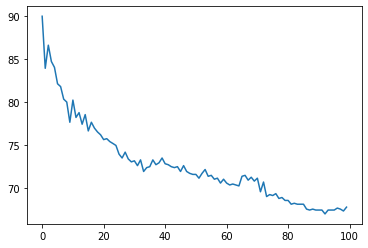

In [58]:
knn_fig = plt.figure()
knn_ax = knn_fig.add_subplot(1,1,1)
knn_acc_data = pd.DataFrame(knn_acc, columns=['col'])
knn_ax.plot(knn_acc_data['col'])

## 2.4. Navie Bayes

In [59]:
nb_pred = train_and_test(GaussianNB(), train_data, test_data)

Accuracy :  78.11 %


## 2.5. SVM

In [60]:
svm_pred = train_and_test(SVC(), train_data, test_data)

Accuracy :  84.29 %


C:\Users\Hong Minji\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# 3. 제출

In [61]:
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": rf_pred
})

In [62]:
submission.to_csv('submission_python_rf.csv', index=False)

In [63]:
submission2 = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": knn_pred_1
})

In [64]:
submission2.to_csv('submission_python_knn.csv', index=False)